## Observations and Insights

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)


In [9]:
import numpy as np

In [3]:
# Combine the data into a single dataset
merge_table = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
merge_table.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
mean = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, 
                          "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

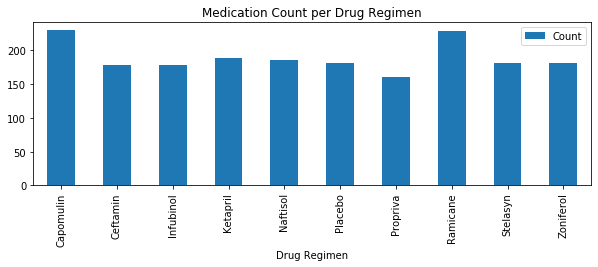

<Figure size 432x288 with 0 Axes>

In [16]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# Filter DF for what we want
grouped_df = pd.DataFrame(merge_table.groupby(["Drug Regimen"]).count()).reset_index()
regimen_datapoints = grouped_df[["Drug Regimen","Mouse ID"]]
regimen_datapoints = regimen_datapoints.rename(columns={"Mouse ID": "Count"})
regimen_datapoints = regimen_datapoints.set_index("Drug Regimen")
regimen_datapoints.plot(kind="bar", figsize=(10,3))

# Set Title and Layout
plt.title("Medication Count per Drug Regimen")
plt.show()
plt.tight_layout()

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Convert columns to list
drug_regimens = summary_df.index.tolist()
drug_regimens

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [7]:
# Convert the count of each regimen to list
regimen_count = (merge_table.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
regimen_count

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

Text(0.5, 1.0, 'Medication Count per Drug Regimen')

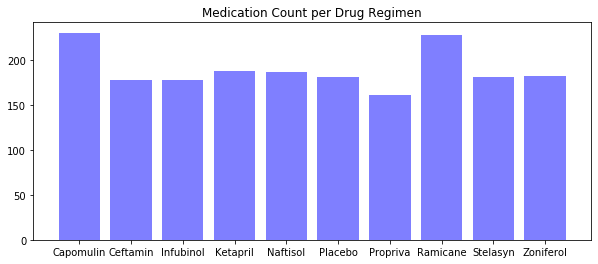

In [15]:
# Set up chart
x_axis = np.arange(len(regimen_count))
x_axis = drug_regimens
plt.figure(figsize=(10,4))
plt.bar(x_axis, regimen_count, color='b', alpha=0.5, align="center")
plt.title("Medication Count per Drug Regimen")

## Pie plots

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(merge_table.groupby(["Sex"]).count()).reset_index()
gender_df.head()

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


In [13]:
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})
gender_df.head()

,Sex,Count
0,Female,935
1,Male,958


Text(0.5, 1.0, 'Medication Distribution among Female Mice vs. Male Mice')

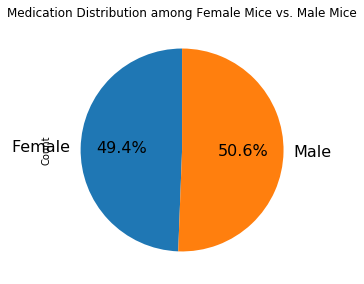

In [20]:
plt.figure(figsize=(10,6))
ax1 = plt.subplot(121, aspect='equal')
gender_df.plot(kind='pie', y = "Count", ax=ax1, autopct='%1.1f%%', 
startangle=90, shadow=False, labels=gender_df['Sex'], legend = False, fontsize=16)
plt.title("Medication Distribution among Female Mice vs. Male Mice")

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = (merge_table.groupby(["Sex"])["Age_months"].count()).tolist()
gender_count

[935, 958]

Text(0.5, 1.0, 'Distribution among Female Mice vs. Male Mice')

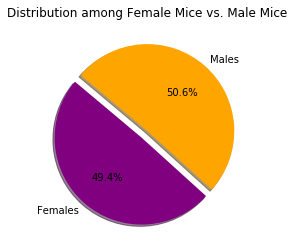

In [21]:
labels = ["Females", "Males"]

colors = ["purple", "orange"]

explode = (0.1, 0)

plt.pie(gender_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Distribution among Female Mice vs. Male Mice")

## Quartiles, outliers and boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest.
merge_table.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [23]:
# Merge & Sort Data in DF 
sorted_df = merge_table.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
max_df = sorted_df.loc[sorted_df["Timepoint"] == 45]
max_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [24]:
# Reset index & Select for Capomulin
cap_data_df = max_df[max_df['Drug Regimen'].isin(['Capomulin'])]
cap_data_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [28]:
# Convert column "Tumor Volume" of the Capomulin regimen into DF object
capomulin_list = cap_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
capomulin_list = capomulin_list["Tumor Volume (mm3)"]
capomulin_list

0     23.343598
1     28.430964
2     28.484033
3     31.023923
4     31.896238
5     32.377357
6     33.329098
7     34.455298
8     36.041047
9     37.074024
10    37.311846
11    38.125164
12    38.846876
13    38.939633
14    38.982878
15    40.159220
16    40.658124
17    40.728578
18    41.483008
19    41.581521
20    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [30]:
quartiles = capomulin_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} are possible outliers.")
print(f"Values above {upper_bound} are possible outliers.")

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 37.31184577 
Values below 20.70456164999999 are possible outliers.
Values above 51.83201549 are possible outliers.


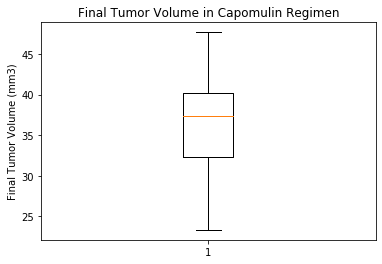

In [31]:
# Generate a box plot of the final tumor volume of each mouse for Capomulin
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Capomulin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(capomulin_list)
plt.show()

In [32]:
# Reset index & Select for Ramicane
ram_data_df = max_df[max_df['Drug Regimen'].isin(['Ramicane'])]
ram_data_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,327,a411,Ramicane,Male,3,22,45,38.407618,1
1,430,a444,Ramicane,Female,10,25,45,43.047543,0
2,214,a520,Ramicane,Male,13,21,45,38.810366,1
3,174,a644,Ramicane,Female,7,17,45,32.978522,1
4,154,c758,Ramicane,Male,9,17,45,33.397653,1


In [33]:
# Convert column "Tumor Volume" of the Ramicane regimen into DF object
ramicane_list = ram_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ramicane_list = ramicane_list["Tumor Volume (mm3)"]
ramicane_list

0     22.050126
1     29.128472
2     30.276232
3     30.564625
4     30.638696
5     31.095335
6     31.560470
7     32.978522
8     33.397653
9     33.562402
10    36.134852
11    36.374510
12    37.225650
13    37.311236
14    38.407618
15    38.810366
16    40.659006
17    40.667713
18    43.047543
19    45.220869
Name: Tumor Volume (mm3), dtype: float64

In [34]:
quartiles = ramicane_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} are possible outliers.")
print(f"Values above {upper_bound} are possible outliers.")

The lower quartile of temperatures is: 30.981175224999998
The upper quartile of temperatures is: 38.508305307499995
The interquartile range of temperatures is: 7.527130082499998
The the median of temperatures is: 34.848627300000004 
Values below 19.690480101250003 are possible outliers.
Values above 49.79900043124999 are possible outliers.


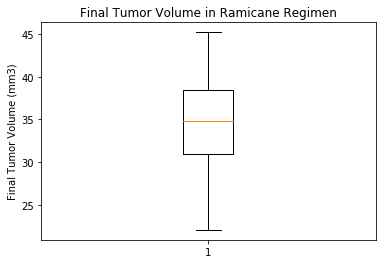

In [35]:
# Generate a box plot of the final tumor volume of each mouse across for Ramicane
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Ramicane Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(ramicane_list)
plt.show()

In [36]:
# Reset index & Select for Naftisol
naft_data_df = max_df[max_df['Drug Regimen'].isin(['Naftisol'])]
naft_data_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,567,a818,Naftisol,Female,12,28,45,74.997764,2
1,610,b559,Naftisol,Male,20,26,45,73.051363,1
2,774,e213,Naftisol,Male,8,27,45,63.105696,4
3,810,e584,Naftisol,Male,9,27,45,68.359777,4
4,1013,j755,Naftisol,Male,23,27,45,69.563621,1


In [37]:
# Convert column "Tumor Volume" of the Naftisol regimen into DF object
naftisol_list = naft_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
naftisol_list = naftisol_list["Tumor Volume (mm3)"]
naftisol_list

0     62.670759
1     63.105696
2     63.586395
3     63.946640
4     65.741070
5     68.359777
6     69.563621
7     69.778544
8     73.051363
9     73.867845
10    74.997764
11    75.113288
12    76.668817
Name: Tumor Volume (mm3), dtype: float64

In [38]:
quartiles = naftisol_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} are possible outliers.")
print(f"Values above {upper_bound} are possible outliers.")

The lower quartile of temperatures is: 63.94664044
The upper quartile of temperatures is: 73.86784476
The interquartile range of temperatures is: 9.921204319999994
The the median of temperatures is: 69.56362076 
Values below 49.064833960000016 are possible outliers.
Values above 88.74965123999999 are possible outliers.


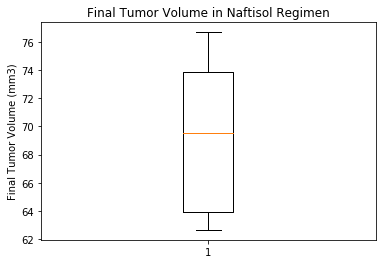

In [40]:
# Generate a box plot of the final tumor volume of each mouse for Nasftisol
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Naftisol Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(naftisol_list)
plt.show()

In [41]:
# Reset index & Select for Propriva
pro_data_df = max_df[max_df['Drug Regimen'].isin(['Propriva'])]
pro_data_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,550,a699,Propriva,Female,5,28,45,62.191414,1
1,903,g570,Propriva,Male,16,29,45,70.492788,2
2,962,i635,Propriva,Male,21,26,45,58.633404,3
3,1290,o562,Propriva,Female,4,25,45,72.455421,2
4,1540,t198,Propriva,Male,22,26,45,64.911363,4


In [42]:
# Convert column "Tumor Volume" of the Naftisol regimen into DF object
propriva_list = pro_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
propriva_list = propriva_list["Tumor Volume (mm3)"]
propriva_list

0    58.633404
1    62.191414
2    64.911363
3    64.957562
4    70.167749
5    70.492788
6    72.455421
Name: Tumor Volume (mm3), dtype: float64

In [43]:
quartiles = propriva_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} are possible outliers.")
print(f"Values above {upper_bound} are possible outliers.")

The lower quartile of temperatures is: 63.55138852499999
The upper quartile of temperatures is: 70.33026831000001
The interquartile range of temperatures is: 6.778879785000015
The the median of temperatures is: 64.95756185 
Values below 53.38306884749997 are possible outliers.
Values above 80.49858798750003 are possible outliers.


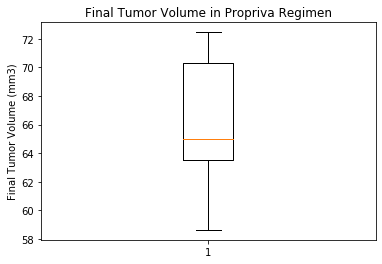

In [44]:
# Generate a box plot of the final tumor volume of each mouse for Nasftisol
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Propriva Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(propriva_list)
plt.show()

## Line and scatter plots

In [45]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = merge_table.loc[merge_table["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [46]:
# Generate Capomulin data for one mouse
capone_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
capone_df

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0
5,15,s185,Capomulin,Female,3,17,25,33.949940,0
6,16,s185,Capomulin,Female,3,17,30,32.959671,1
7,17,s185,Capomulin,Female,3,17,35,28.328531,1
8,18,s185,Capomulin,Female,3,17,40,25.472143,1
9,19,s185,Capomulin,Female,3,17,45,23.343598,1


Text(17.200000000000003, 0.5, 'Final Tumor Volume (mm3)')

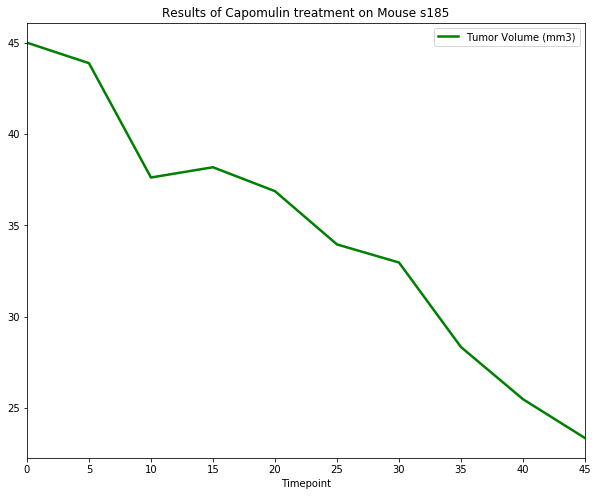

In [51]:
# Selecting only 2 columns
capone_df = capone_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
capone_df = capone_df.reset_index(drop=True)
capone_df.set_index('Timepoint').plot(figsize=(10, 8), linewidth=2.5, color='green')
plt.title("Results of Capomulin treatment on Mouse s185")
ax1.set_ylabel('Final Tumor Volume (mm3)')

In [53]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [54]:
# Display Capomulin data again for easy vieweing
capomulin_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [55]:
# trim down capomulin df 
cap_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
cap_df.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,s185,17,45.000000
1,s185,17,43.878496
2,s185,17,37.614948
3,s185,17,38.177232
4,s185,17,36.866876


In [58]:
# Calculate average tumor volume for each mouse in the Capomulin regimen
capomulin_tumor_df = pd.DataFrame(cap_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
capomulin_tumor_df = capomulin_tumor_df.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume"})
capomulin_tumor_df.head()

,Mouse ID,Weight (g),Average Tumor Volume
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [60]:
# Set 'Mouse ID' as index
average_capomulin = capomulin_tumor_df.set_index('Mouse ID')

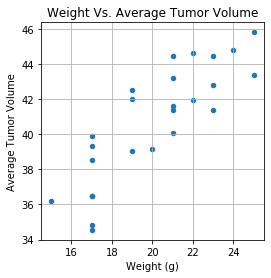

In [62]:
# Scatter Plot
average_capomulin.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume", grid=True, figsize=(4,4),
              title="Weight Vs. Average Tumor Volume")
plt.show()

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the 
# Capomulin regimen.

In [65]:
# Correlation Coefficient
mouse_weight = average_capomulin.iloc[:,0]
avg_tumor_volume = average_capomulin.iloc[:,1]
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation between the factors is {round(correlation[0],2)}")

The correlation between the factors is 0.84


In [70]:
from scipy.stats import linregress

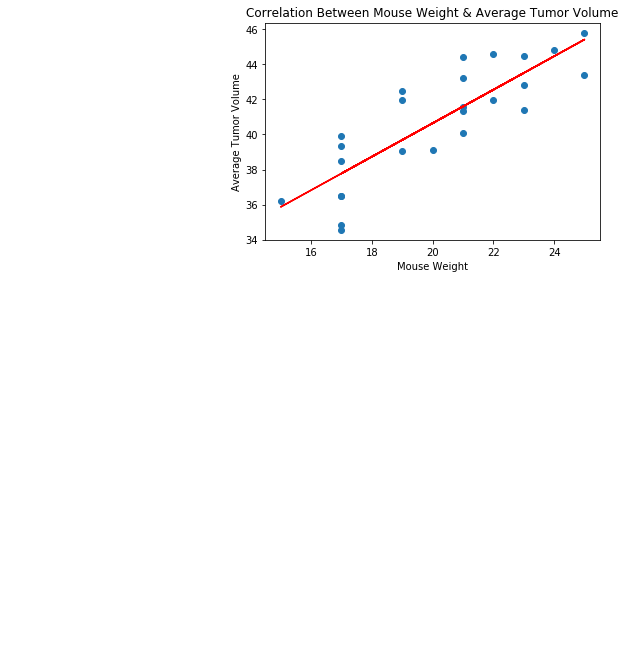

In [74]:
# Add the linear regression equation and line to plot
x_values = average_capomulin['Weight (g)']
y_values = average_capomulin['Average Tumor Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="purple")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.title('Correlation Between Mouse Weight & Average Tumor Volume')
plt.show()